# CASE STUDY 2: Measures of Central Tendency and Dispersion
An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information.
   1. Find out how many males and females participated in the test.
   2. What do you think about the students' parental level of education?
   3. Who scores the most on average for math, reading and writing based on
          ● Gender
          ● Test preparation course
   4. What do you think about the scoring variation for math, reading and writing based on 
          ● Gender
          ● Test preparation course
   5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.


# Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to the python environment.

In [7]:
stud_perf='StudentsPerformance.csv'
df=pd.read_csv(stud_perf)

# Printing the dataset

In [8]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# 1. Find out how many males and females participated in the test.

In [257]:
#to check weather any other datatypes other than male and female exist in the data
df["gender"].unique()


array(['female', 'male'], dtype=object)

In [53]:
#method 1
dff= df[(df['gender']=='female')]
dfm= df[(df['gender']=='male')]

In [47]:
count=0
for i in dff['gender']:
    count+=1
count1=0
for i in dfm['gender']:
    count1+=1
print('Male and female participants in the dataset are:\nMale:',count1,'\nFemale:',count)

Male and female participants in the dataset are:
Male: 482 
Female: 518


In [48]:
#method2
count_of_gender=df.groupby('gender').size()
print('Male and female participants in the dataset are:')
count_of_gender

Male and female participants in the dataset are:


gender
female    518
male      482
dtype: int64

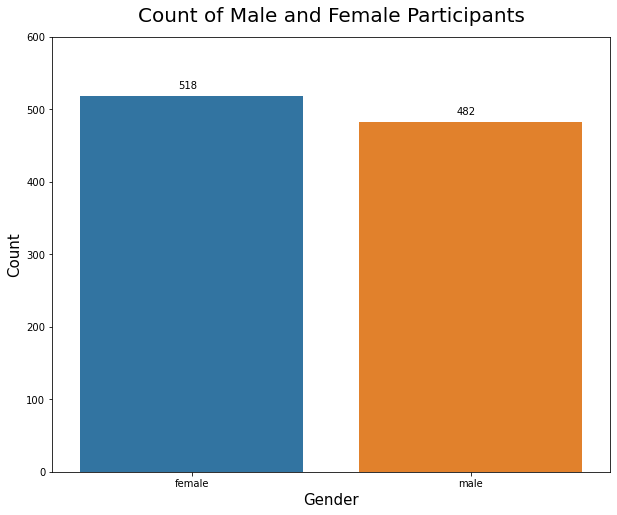

In [262]:
#Plotting Graph
fig, ax = plt.subplots(figsize=(10,8))
plt.ylim(0, 600)
plt.xlabel("xlabel",fontsize=15)
plt.ylabel("ylabel",fontsize=15)
graph=sns.countplot(x=df["gender"])
graph.set_title("Count of Male and Female Participants",fontsize=20,pad=15)
graph.set(xlabel="Gender", ylabel="Count")

for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

# INFERENCE
    There are 482 Males and 518 Females which means there are 36 Females more.

# 2. What do you think about the students' parental level of education?

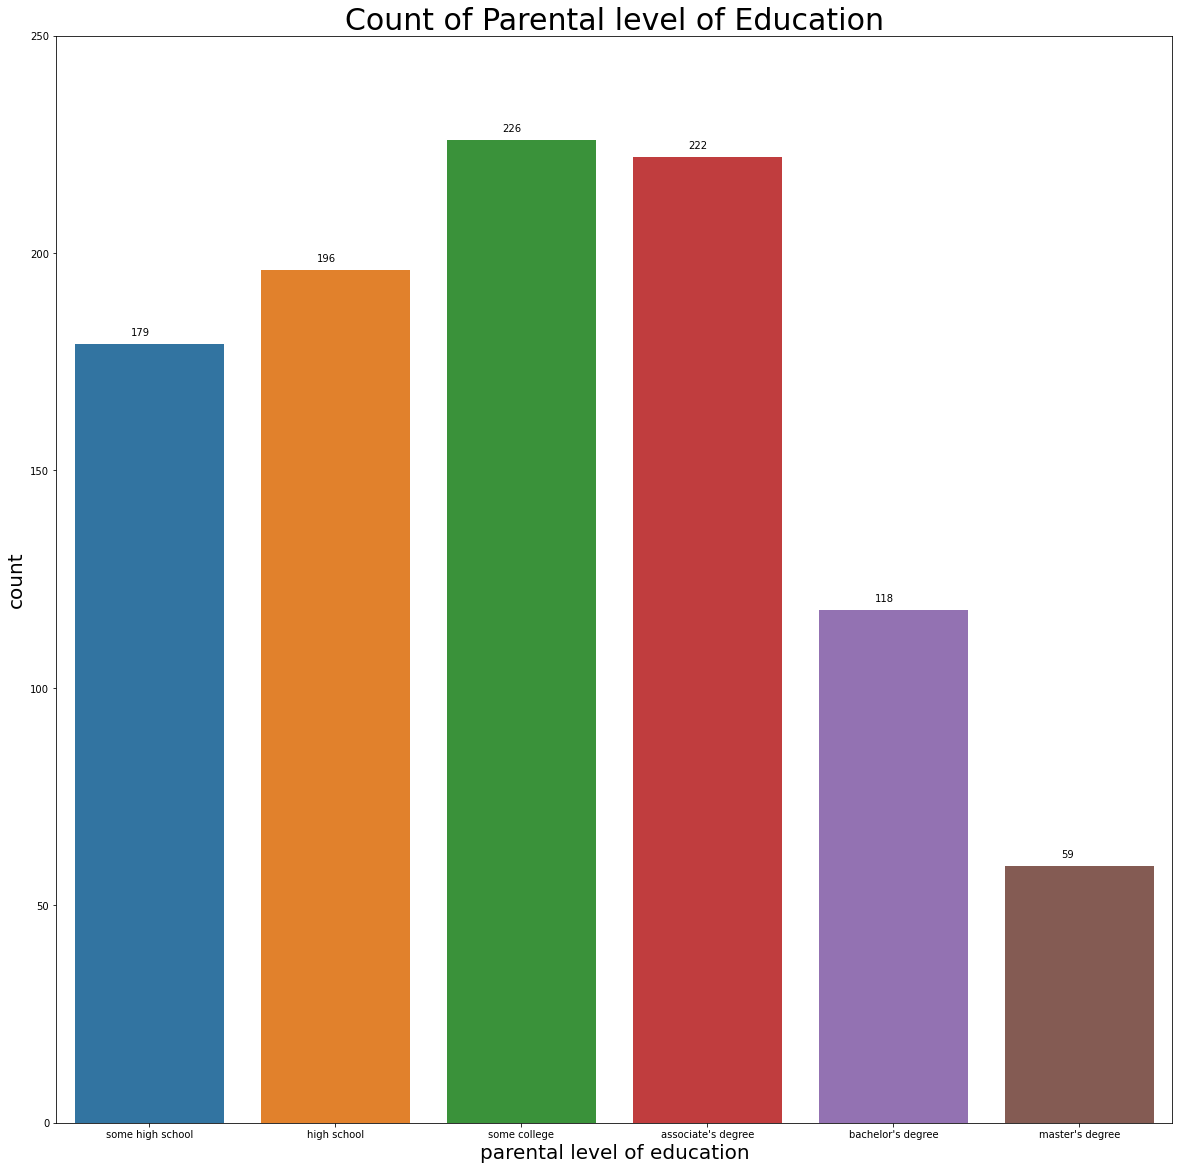

In [268]:
#Plotting Graph
plt.figure(figsize=(20,20))
plt.ylim(0,250)
plt.xlabel("xlabel",fontsize=20)
plt.ylabel("ylabel",fontsize=20)

graph=sns.countplot(x='parental level of education',data=df)
plt.title('Count of Parental level of Education',size=30)
for p in graph.patches:
        graph.annotate('{}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+2))

# INSIGHTS
    1.Most parents went to some college ie a count of 226.
    2.Second ranking is for parents who has an Associate's degree which has a count of 222.
    3.Least number of parents have a Masters degree which is only 59.

# 3. Who scores the most on average for math, reading and writing based on
          ● Gender
          ● Test preparation course

In [179]:
#gender
df_gen_mean=df.groupby('gender',as_index=False)[["math score","reading score","writing score"]].mean()

#test preparation course

df_course_mean=df.groupby('test preparation course',as_index=False)[["math score","reading score","writing score"]].mean()

print('Mean score values of MALE and FEMALE participants are:\n')
df_gen_mean

Mean score values of MALE and FEMALE participants are:



,gender,math score,reading score,writing score
0,female,63.376448,72.590734,72.467181
1,male,68.821577,65.545643,63.446058


In [180]:
print('Mean score for test preparation course completed and none completed are:\n')
df_course_mean

Mean score for test preparation course completed and none completed are:



,test preparation course,math score,reading score,writing score
0,completed,69.96648,74.175978,74.684358
1,none,63.78972,66.417445,64.457944


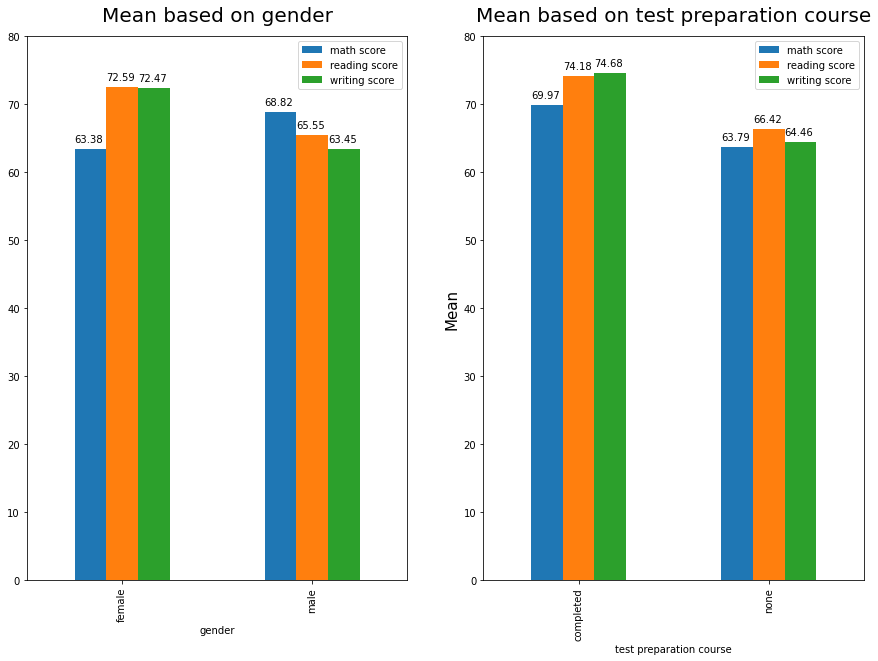

In [253]:
#plotting for better understanding
fig, ax = plt.subplots(1,2,figsize=(15,10))
ax[0].set_ylim(0, 80)
ax[1].set_ylim(0, 80)
plt.ylabel("Mean",fontsize=15)

graph=df_gen_mean[["gender","math score","reading score","writing score"]].plot(x="gender", kind="bar",ax=ax[0])
graph.set_title('Mean based on gender',fontsize=20,pad=15)

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+1))
graph=df_course_mean[["test preparation course","math score","reading score","writing score"]].plot(x="test preparation course", kind="bar",ax=ax[1])
graph.set_title('Mean based on test preparation course',fontsize=20,pad=15)
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+1))

# INSIGHTS
    1.Based on gender male scored a higher average of 68.82 in maths while female scored higher in reading and writing which were 72.59 and 72.47 respectively
    2.Based on test preparation course, The ones who completed has a higher average in all three sections which is maths, reading and writing which are 69.97, 74.18 and 74.68 respectively.

#  4. What do you think about the scoring variation for math, reading and writing based on 
          ● Gender
          ● Test preparation course

In [181]:
#gender
df_gen_std=df.groupby('gender',as_index=False)[["math score","reading score","writing score"]].std()

#test preparation course

df_course_std=df.groupby('test preparation course',as_index=False)[["math score","reading score","writing score"]].std()

print('Variation in score values of MALE and FEMALE participants are:\n')
df_gen_std



Variation in score values of MALE and FEMALE participants are:



,gender,math score,reading score,writing score
0,female,16.029928,14.411018,14.844842
1,male,14.556411,14.149594,14.227225


In [182]:
print('Variation in score values as per test preparation course completed Scores and none completed are:\n')
df_course_std

Variation in score values as per test preparation course completed Scores and none completed are:



,test preparation course,math score,reading score,writing score
0,completed,14.521847,13.537572,13.236412
1,none,15.705689,14.608896,15.041667


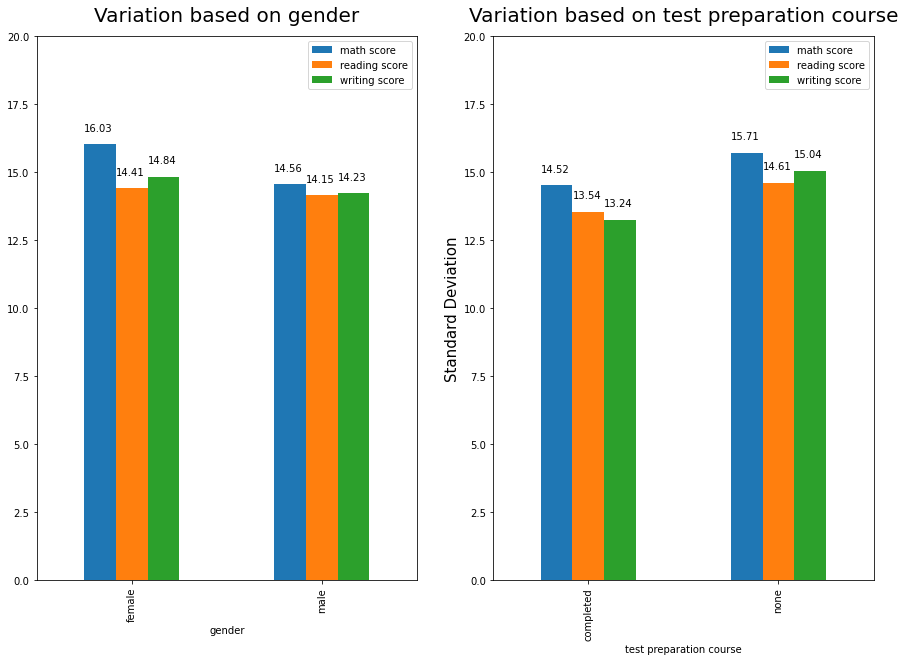

In [254]:
fig, ax = plt.subplots(1,2,figsize=(15,10))

ax[0].set_ylim(0, 20)
ax[1].set_ylim(0, 20)
plt.ylabel("Standard Deviation",fontsize=15)

graph=df_gen_std[["gender","math score","reading score","writing score"]].plot(x="gender", kind="bar",ax=ax[0])
graph.set_title('Variation based on gender',fontsize=20,pad=15)

for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+.5))
graph=df_course_std[["test preparation course","math score","reading score","writing score"]].plot(x="test preparation course", kind="bar",ax=ax[1])
graph.set_title('Variation based on test preparation course',fontsize=20,pad=15)
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.0, p.get_height()+.5))

# INSIGHTS
    1.Based on gender male has less variance in all three sections which is maths, reading and writing which are 14.56, 14.15 and 14.23 respectively.
    2.Based on test preparation course, The ones who completed has less Variation  in all three sections which is maths, reading and writing which are 14.52, 13.54 and 13.24 respectively.

#  5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.


In [32]:
df_math_sort=df.sort_values('math score')
df_math_sort=df_math_sort.tail(260)
pd.set_option('display.max_rows',260)
df_math_sort


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
839,male,group C,some high school,standard,completed,76,80,73
848,male,group E,some college,standard,none,76,71,72
412,female,group D,associate's degree,standard,none,76,74,73
837,male,group C,master's degree,free/reduced,completed,76,76,46
413,female,group E,some college,standard,none,76,78,80
414,female,group A,high school,free/reduced,completed,77,88,85
426,female,group D,some college,standard,none,77,68,77
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
851,male,group D,some college,standard,completed,77,62,62


# Although top 25% only include 250/1000 students it is seen that the least score is 77 which is scored by 5 more students as per the data. Hence the management needs to consider 255 students for bonus points as per the data and the list of students are:

In [33]:
df_math_sort=df_math_sort.tail(260)
pd.set_option('display.max_rows',260)
df_math_sort[df_math_sort["math score"]>=77]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
426,female,group D,some college,standard,none,77,68,77
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
851,male,group D,some college,standard,completed,77,62,62
852,male,group D,some college,free/reduced,none,77,62,64
853,male,group D,associate's degree,free/reduced,none,77,78,73
854,male,group D,some high school,standard,completed,77,68,69
855,male,group E,associate's degree,free/reduced,completed,77,69,68
856,male,group E,some high school,standard,completed,77,76,77


# INFERENCE
    There are 255 students eligible for the bonus points.